<a href="https://colab.research.google.com/github/StefTse/AIDL_xrcises/blob/main/aidl02_assignment_Tsemperlidis_0035_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####University of West Attica
####MSc in Artificial Intelligence & Deep Learning
###Assignment for AIDL02 Neural Networks
####Stefanos Tsemperlidis
######mscaidl-0035@uniwa.gr

###Image Classification of shoes from different brands

#####The dataset contains 2 folders: one with the test data and the other one with train data. The test-train-split ratio is 0.14, with the test dataset containing 114 images and the train dataset containing 711. The images have a resolution of 240x240 pixels in RGB color model.Both the folders contain 3 classes:

*   Adidas
*   Converse
*   Nike

The dataset and other information can be found here: https://www.kaggle.com/datasets/die9origephit/nike-adidas-and-converse-imaged




###Dataset download


In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"steftse","key":"8f41d3b11362487fa0c592efb368550e"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle datasets download -d 'die9origephit/nike-adidas-and-converse-imaged'

 71% 11.0M/15.6M [00:00<00:00, 113MB/s]
100% 15.6M/15.6M [00:00<00:00, 136MB/s]


In [5]:
! mkdir nike-adidas-and-converse-imaged
! unzip nike-adidas-and-converse-imaged.zip  -d nike-adidas-and-converse-imaged

Archive:  nike-adidas-and-converse-imaged.zip
  inflating: nike-adidas-and-converse-imaged/test/adidas/0.jpg  
  inflating: nike-adidas-and-converse-imaged/test/adidas/1.jpg  
  inflating: nike-adidas-and-converse-imaged/test/adidas/10.jpg  
  inflating: nike-adidas-and-converse-imaged/test/adidas/11.jpg  
  inflating: nike-adidas-and-converse-imaged/test/adidas/12.jpg  
  inflating: nike-adidas-and-converse-imaged/test/adidas/13.jpg  
  inflating: nike-adidas-and-converse-imaged/test/adidas/14.jpg  
  inflating: nike-adidas-and-converse-imaged/test/adidas/15.jpg  
  inflating: nike-adidas-and-converse-imaged/test/adidas/16.jpg  
  inflating: nike-adidas-and-converse-imaged/test/adidas/17.jpg  
  inflating: nike-adidas-and-converse-imaged/test/adidas/18.jpg  
  inflating: nike-adidas-and-converse-imaged/test/adidas/19.jpg  
  inflating: nike-adidas-and-converse-imaged/test/adidas/2.jpg  
  inflating: nike-adidas-and-converse-imaged/test/adidas/20.jpg  
  inflating: nike-adidas-and-conv

###Load tools and prepare the dataset


In [6]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils
from sklearn.model_selection import train_test_split
from time import time
import os
import cv2
import numpy as np
import pathlib 


In [7]:
train_dir = "/content/nike-adidas-and-converse-imaged/train"
train_classes=os.listdir(train_dir)

test_dir = "/content/nike-adidas-and-converse-imaged/test"
test_classes=os.listdir(test_dir)

print(train_classes)

['converse', 'nike', 'adidas']


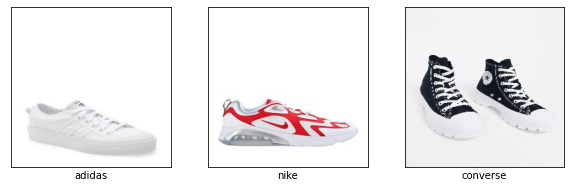

In [8]:
classes = ['adidas', 'nike', 'converse']
plt.figure(figsize=(10, 10))
for i in range (0,3):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    path = train_dir + "/{}/100.jpg".format(classes[i])
    img = plt.imread(path)
    plt.imshow(img)
    plt.xlabel(classes[i])


In [9]:
def load_data(train_dir):
    images = []
    labels = []
    size = 240,240
    index = -1
    for folder in os.listdir(train_dir):
        index +=1
        for image in os.listdir(train_dir + "/" + folder):
            temp_img = cv2.imread(train_dir + '/' + folder + '/' + image)
            temp_img = cv2.resize(temp_img, size)
            images.append(temp_img)
            labels.append(index)
    
    images = np.array(images)
    images = images.astype('float32')/255.0
    labels = utils.to_categorical(labels)
    x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.1, random_state = 0)
    
    print('Loaded', len(x_train),'images for training,','Train data shape =', x_train.shape)
    print('Loaded', len(x_test),'images for testing','Test data shape =', x_test.shape)
    return x_train, x_test, y_train, y_test

start = time()
x_train, x_test, y_train, y_test = load_data(train_dir)
print('Loading:', time() - start)

Loaded 639 images for training, Train data shape = (639, 240, 240, 3)
Loaded 72 images for testing Test data shape = (72, 240, 240, 3)
Loading: 1.085616111755371


###Custom CNN

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import random as rn
from tensorflow import random

In [ ]:
#os.environ['PYTHONHASHSEED'] = '0'

In [ ]:
#np.random.seed(1)

In [ ]:
#rn.seed(2)

In [ ]:
#tf.random.set_seed(3)

In [11]:
#define hyperparameters
classes = 3
batch = 7
epochs = 500
learning_rate = 0.0001

In [76]:
#train, test and validation splits
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state = 1) 



In [14]:
#CNN model
model = Sequential()


model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
#model.add(Dropout(0.25))

model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
#model.add(Dropout(0.25))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
#model.add(Dropout(0.25))

model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Dropout(0.25))

model.add(Conv2D(16 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
#model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(units =512, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(classes, activation = 'softmax'))

In [15]:
#train CNN

adam = Adam(learning_rate)
keras_callbacks = [EarlyStopping(monitor='val_loss', patience=50, mode='min', min_delta=0.0001), ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min',verbose=1)]
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=batch, epochs=epochs, validation_split=0.1, shuffle = True, verbose=1, callbacks=[keras_callbacks])

Epoch 1/500
83/83 [==============================] - ETA: 0s - loss: 1.5353 - accuracy: 0.3774
Epoch 1: val_loss improved from inf to 1.12008, saving model to best_model.h5
83/83 [==============================] - 3s 24ms/step - loss: 1.5353 - accuracy: 0.3774 - val_loss: 1.1201 - val_accuracy: 0.3281
Epoch 2/500
82/83 [============================>.] - ETA: 0s - loss: 1.1867 - accuracy: 0.5000
Epoch 2: val_loss did not improve from 1.12008
83/83 [==============================] - 1s 18ms/step - loss: 1.1920 - accuracy: 0.4991 - val_loss: 1.2412 - val_accuracy: 0.3594
Epoch 3/500
81/83 [============================>.] - ETA: 0s - loss: 0.9323 - accuracy: 0.5697
Epoch 3: val_loss did not improve from 1.12008
83/83 [==============================] - 2s 18ms/step - loss: 0.9378 - accuracy: 0.5670 - val_loss: 1.3049 - val_accuracy: 0.3594
Epoch 4/500
82/83 [============================>.] - ETA: 0s - loss: 0.8402 - accuracy: 0.6376
Epoch 4: val_loss improved from 1.12008 to 1.11314, saving

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 240, 240, 32)      896       
                                                                 
 batch_normalization_4 (Batc  (None, 240, 240, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 120, 120, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 120, 120, 32)      9248      
                                                                 
 batch_normalization_5 (Batc  (None, 120, 120, 32)     128       
 hNormalization)                                                 
                                                      

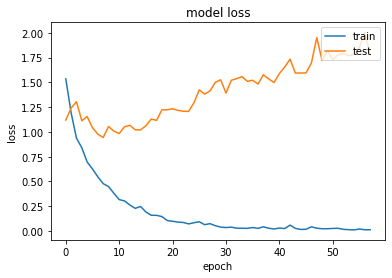

In [17]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

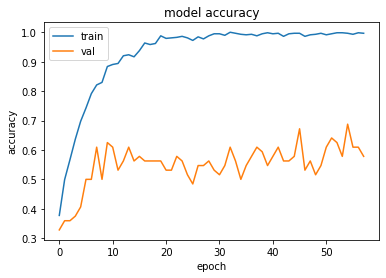

In [18]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [19]:
history.model.load_weights('best_model.h5')
print("Test accuracy:", np.mean(np.argmax(history.model.predict(x_test),1)==np.argmax(y_test,1)))
print("Train accuracy:", np.mean(np.argmax(history.model.predict(x_train),1)==np.argmax(y_train,1)))

Test accuracy: 0.6805555555555556
Train accuracy: 0.8716744913928013


##Tranfer learning
###VGG16 

In [20]:
# VGG16 

from tensorflow.keras.applications import VGG16

base_model_1 = VGG16(
    weights='imagenet',
    input_shape=(240, 240, 3),
    include_top=False) 

base_model_1.trainable =  False

# add layers to base model
inputs = keras.Input(shape=(240, 240, 3))

x = base_model_1(inputs, training=False)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(512, activation='relu')(x)
x = keras.layers.Dropout(0.2)(x)

outputs = keras.layers.Dense(3, activation = 'sigmoid')(x)


model_2 = keras.Model(inputs,outputs)


#model_2 = Sequential()
#model_2.add(VGG16(weights='imagenet', include_top=False, input_shape=(240,240,3)))
#model_2.add(Flatten())
#model_2.add(Dense(512, activation='relu'))
#model_2.add(Dense(classes, activation='softmax'))

58900480/58889256 [==============================] - 0s 0us/step


In [21]:
adam = Adam(learning_rate)
keras_callbacks = [EarlyStopping(monitor='val_loss', patience=50, mode='min', min_delta=0.0001), ModelCheckpoint('best_model.h6', monitor='val_loss', save_best_only=True, mode='min',verbose=1)]
model_2.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history_2= model_2.fit(x_train, y_train, batch_size=batch, epochs=epochs, validation_split=0.1, shuffle = True, verbose=1, callbacks=[keras_callbacks])

Epoch 1/500
83/83 [==============================] - ETA: 0s - loss: 0.9320 - accuracy: 0.5791
Epoch 1: val_loss improved from inf to 0.81474, saving model to best_model.h6
83/83 [==============================] - 11s 112ms/step - loss: 0.9320 - accuracy: 0.5791 - val_loss: 0.8147 - val_accuracy: 0.6094
Epoch 2/500
82/83 [============================>.] - ETA: 0s - loss: 0.2896 - accuracy: 0.8955
Epoch 2: val_loss improved from 0.81474 to 0.62268, saving model to best_model.h6
83/83 [==============================] - 9s 105ms/step - loss: 0.2891 - accuracy: 0.8957 - val_loss: 0.6227 - val_accuracy: 0.7031
Epoch 3/500
82/83 [============================>.] - ETA: 0s - loss: 0.1891 - accuracy: 0.9321
Epoch 3: val_loss did not improve from 0.62268
83/83 [==============================] - 6s 70ms/step - loss: 0.1888 - accuracy: 0.9322 - val_loss: 0.7740 - val_accuracy: 0.7344
Epoch 4/500
82/83 [============================>.] - ETA: 0s - loss: 0.0643 - accuracy: 0.9878
Epoch 4: val_loss di

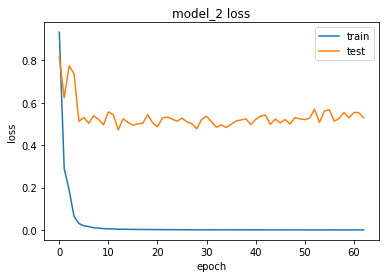

In [22]:
# summarize history for loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model_2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


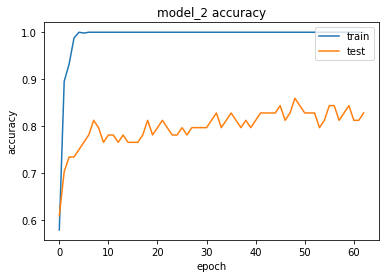

In [23]:
# summarize history for accuracy
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model_2 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()



In [24]:
model_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 240, 240, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_4 (Dense)             (None, 512)               12845568  
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 27,561,795
Trainable params: 12,847,107
Non-tra

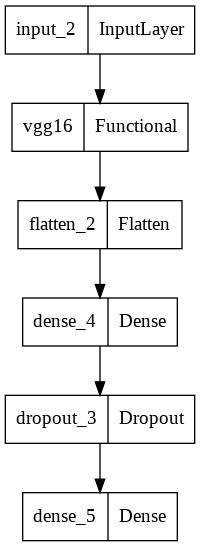

In [25]:
keras.utils.plot_model(model_2, "vgg16_model.png")

In [26]:
history_2.model.load_weights('best_model.h6')
print("Test accuracy:", np.mean(np.argmax(history_2.model.predict(x_test),1)==np.argmax(y_test,1)))
print("Train accuracy:", np.mean(np.argmax(history_2.model.predict(x_train),1)==np.argmax(y_train,1)))


Test accuracy: 0.8472222222222222
Train accuracy: 0.9765258215962441


###ResNet50

In [27]:
#ResNet50
from tensorflow.keras.applications import ResNet50

base_model_2 = ResNet50(
    weights='imagenet',
    input_shape=(240, 240, 3),
    include_top=False) 

base_model_2.trainable =  False

inputs = keras.Input(shape=(240, 240, 3))

x = base_model_2(inputs, training=False)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(512, activation='relu')(x)
x = keras.layers.Dropout(0.25)(x)

outputs = keras.layers.Dense(3, activation = 'sigmoid')(x)


model_3 = keras.Model(inputs,outputs)


94781440/94765736 [==============================] - 1s 0us/step


In [28]:
adam = Adam(learning_rate)
keras_callbacks = [EarlyStopping(monitor='val_loss', patience=50, mode='min', min_delta=0.0001), ModelCheckpoint('best_model.h7', monitor='val_loss', save_best_only=True, mode='min',verbose=1)]
model_3.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history_3 = model_3.fit(x_train, y_train, batch_size=batch, epochs=epochs, validation_split=0.1, shuffle = True, verbose=1, callbacks=[keras_callbacks])

Epoch 1/500
83/83 [==============================] - ETA: 0s - loss: 2.0199 - accuracy: 0.3461
Epoch 1: val_loss improved from inf to 1.21279, saving model to best_model.h7
83/83 [==============================] - 32s 344ms/step - loss: 2.0199 - accuracy: 0.3461 - val_loss: 1.2128 - val_accuracy: 0.3750
Epoch 2/500
82/83 [============================>.] - ETA: 0s - loss: 1.0746 - accuracy: 0.4373
Epoch 2: val_loss improved from 1.21279 to 1.05298, saving model to best_model.h7
83/83 [==============================] - 28s 337ms/step - loss: 1.0750 - accuracy: 0.4365 - val_loss: 1.0530 - val_accuracy: 0.3750
Epoch 3/500
82/83 [============================>.] - ETA: 0s - loss: 1.0692 - accuracy: 0.4390
Epoch 3: val_loss improved from 1.05298 to 1.04314, saving model to best_model.h7
83/83 [==============================] - 27s 331ms/step - loss: 1.0702 - accuracy: 0.4383 - val_loss: 1.0431 - val_accuracy: 0.3906
Epoch 4/500
82/83 [============================>.] - ETA: 0s - loss: 1.0285 -

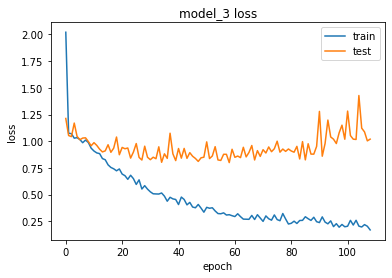

In [29]:
# summarize history for loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model_3 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

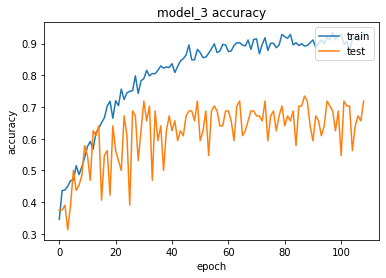

In [30]:
# summarize history for accuracy
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('model_3 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [31]:
model_3.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 240, 240, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 flatten_3 (Flatten)         (None, 131072)            0         
                                                                 
 dense_6 (Dense)             (None, 512)               67109376  
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 90,698,627
Trainable params: 67,110,915
Non-t

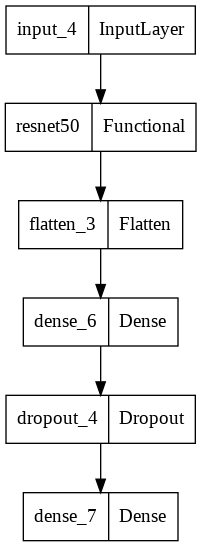

In [32]:
keras.utils.plot_model(model_3, "ResNet50_model.png")

In [34]:
history_3.model.load_weights('best_model.h7')
print("Test accuracy:", np.mean(np.argmax(history_3.model.predict(x_test),1)==np.argmax(y_test,1)))
print("Train accuracy:", np.mean(np.argmax(history_3.model.predict(x_train),1)==np.argmax(y_train,1)))

Test accuracy: 0.7222222222222222
Train accuracy: 0.9139280125195618


In [35]:
#ResNet_02
batch_2=12
learning_rate_2= 0.002

base_model_3 = ResNet50(
    weights='imagenet',
    input_shape=(240, 240, 3),
    include_top=False) 

base_model_3.trainable =  False

inputs = keras.Input(shape=(240, 240, 3))

x = base_model_3(inputs, training=False)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(512, activation='relu')(x)
x = keras.layers.Dropout(0.5)(x)

outputs = keras.layers.Dense(3, activation = 'sigmoid')(x)


model_4 = keras.Model(inputs,outputs)

In [36]:
adam = Adam(learning_rate_2)
keras_callbacks = [EarlyStopping(monitor='val_loss', patience=50, mode='min', min_delta=0.0001), ModelCheckpoint('best_model.h8', monitor='val_loss', save_best_only=True, mode='min',verbose=1)]
model_4.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history_4 = model_4.fit(x_train, y_train, batch_size=batch_2, epochs=epochs, validation_split=0.1, shuffle = True, verbose=1, callbacks=[keras_callbacks])

Epoch 1/500
48/48 [==============================] - ETA: 0s - loss: 40.3871 - accuracy: 0.3443
Epoch 1: val_loss improved from inf to 7.56621, saving model to best_model.h8
48/48 [==============================] - 32s 615ms/step - loss: 40.3871 - accuracy: 0.3443 - val_loss: 7.5662 - val_accuracy: 0.3594
Epoch 2/500
48/48 [==============================] - ETA: 0s - loss: 1.9938 - accuracy: 0.3443
Epoch 2: val_loss improved from 7.56621 to 1.09813, saving model to best_model.h8
48/48 [==============================] - 27s 574ms/step - loss: 1.9938 - accuracy: 0.3443 - val_loss: 1.0981 - val_accuracy: 0.2969
Epoch 3/500
48/48 [==============================] - ETA: 0s - loss: 1.1075 - accuracy: 0.3200
Epoch 3: val_loss did not improve from 1.09813
48/48 [==============================] - 4s 79ms/step - loss: 1.1075 - accuracy: 0.3200 - val_loss: 1.0986 - val_accuracy: 0.3281
Epoch 4/500
48/48 [==============================] - ETA: 0s - loss: 1.0946 - accuracy: 0.3565
Epoch 4: val_loss

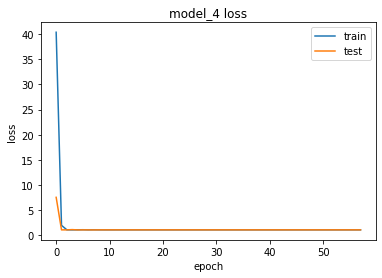

In [37]:
# summarize history for loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model_4 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

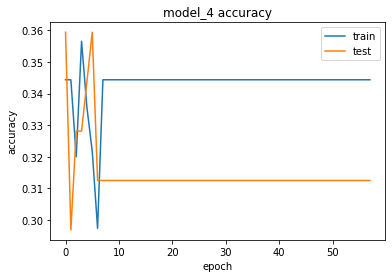

In [38]:
# summarize history for accuracy
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('model_4 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [39]:
model_4.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 240, 240, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 flatten_4 (Flatten)         (None, 131072)            0         
                                                                 
 dense_8 (Dense)             (None, 512)               67109376  
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 90,698,627
Trainable params: 67,110,915
Non-t

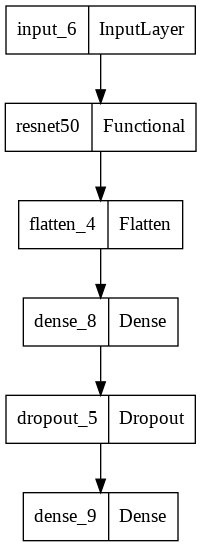

In [40]:
keras.utils.plot_model(model_4, "ResNet50_model.png")

In [41]:
history_4.model.load_weights('best_model.h8')
print("Test accuracy:", np.mean(np.argmax(history_4.model.predict(x_test),1)==np.argmax(y_test,1)))
print("Train accuracy:", np.mean(np.argmax(history_4.model.predict(x_train),1)==np.argmax(y_train,1)))

Test accuracy: 0.25
Train accuracy: 0.3411580594679186


###Transfer learning & Data augmentation

In [46]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


#base_model = VGG16(
 #   weights='imagenet',
  #  input_shape=(32, 32, 3),
   # include_top=False)


base_model_1.trainable =  False

# add layers to base model
inputs = keras.Input(shape=(240, 240, 3))

x = base_model_1(inputs, training=False)


x = keras.layers.Flatten()(x)
x = keras.layers.Dense(512, activation='relu')(x)
x = keras.layers.Dropout(0.2)(x)


outputs = keras.layers.Dense(3, activation = 'softmax')(x)

# Combine inputs and outputs to create model
model_5 = keras.Model(inputs,outputs)

adam = Adam(learning_rate)
datagen = ImageDataGenerator(
        featurewise_center=True, 
        samplewise_center=True,  
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=True,  
        vertical_flip=False) 

datagen.fit(x_train)

In [47]:
keras_callbacks = [EarlyStopping(monitor='val_loss', patience=50, mode='min', min_delta=0.0001), ModelCheckpoint('best_model.h9', monitor='val_loss', save_best_only=True, mode='min',verbose=1)]
model_5.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history_5=model_5.fit(datagen.flow(x_train, y_train, batch_size=12),
          steps_per_epoch=len(x_train) / 32, epochs=500, validation_data=(x_val, y_val), shuffle = True, callbacks=[keras_callbacks])

Epoch 1/500
18/17 [==============================] - ETA: 0s - loss: 1.3285 - accuracy: 0.3814
Epoch 1: val_loss improved from inf to 1.02750, saving model to best_model.h9
17/17 [==============================] - 10s 450ms/step - loss: 1.3285 - accuracy: 0.3814 - val_loss: 1.0275 - val_accuracy: 0.5156
Epoch 2/500
18/17 [==============================] - ETA: 0s - loss: 0.9083 - accuracy: 0.5370
Epoch 2: val_loss improved from 1.02750 to 0.77276, saving model to best_model.h9
17/17 [==============================] - 6s 348ms/step - loss: 0.9083 - accuracy: 0.5370 - val_loss: 0.7728 - val_accuracy: 0.6562
Epoch 3/500
18/17 [==============================] - ETA: 0s - loss: 0.7267 - accuracy: 0.7361
Epoch 3: val_loss improved from 0.77276 to 0.74090, saving model to best_model.h9
17/17 [==============================] - 7s 368ms/step - loss: 0.7267 - accuracy: 0.7361 - val_loss: 0.7409 - val_accuracy: 0.6719
Epoch 4/500
18/17 [==============================] - ETA: 0s - loss: 0.6332 - a

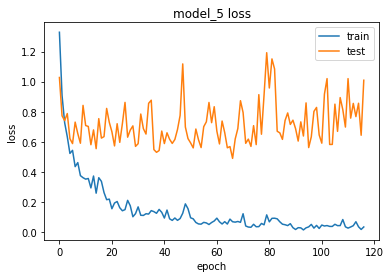

In [48]:
# summarize history for loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model_5 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

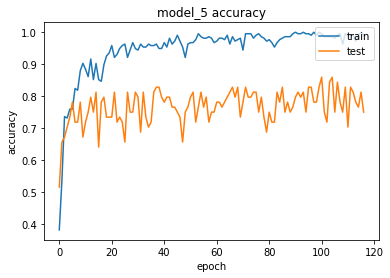

In [49]:
# summarize history for accuracy
plt.plot(history_5.history['accuracy'])
plt.plot(history_5.history['val_accuracy'])
plt.title('model_5 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [50]:
model_5.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 240, 240, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_6 (Flatten)         (None, 25088)             0         
                                                                 
 dense_12 (Dense)            (None, 512)               12845568  
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 3)                 1539      
                                                                 
Total params: 27,561,795
Trainable params: 12,847,107
Non-t

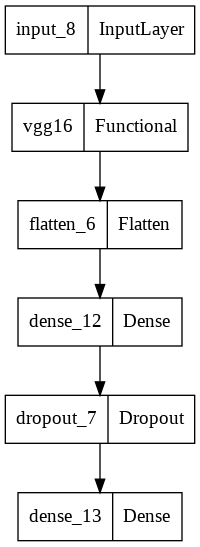

In [51]:
keras.utils.plot_model(model_5, "vgg16_aug_model.png")

In [52]:
history_5.model.load_weights('best_model.h9')
print("Test accuracy:", np.mean(np.argmax(history_5.model.predict(x_test),1)==np.argmax(y_test,1)))
print("Train accuracy:",  np.mean(np.argmax(history_5.model.predict(x_train),1)==np.argmax(y_train,1)))

Test accuracy: 0.8333333333333334
Train accuracy: 0.9982608695652174


In [55]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


#base_model_2 = ResNet50(
 #   weights='imagenet',
  #  input_shape=(32, 32, 3),
   # include_top=False)


base_model_2.trainable =  False


inputs = keras.Input(shape=(240, 240, 3))

x = base_model_2(inputs, training=False)


x = keras.layers.Flatten()(x)
x = keras.layers.Dense(512, activation='relu')(x)
x = keras.layers.Dropout(0.25)(x)
#x = keras.layers.GlobalAveragePooling2D()(x)


outputs = keras.layers.Dense(3, activation = 'softmax')(x)

# Combine inputs and outputs to create model
model_6 = keras.Model(inputs,outputs)


In [56]:
keras_callbacks = [EarlyStopping(monitor='val_loss', patience=50, mode='min', min_delta=0.0001), ModelCheckpoint('best_model.h10', monitor='val_loss', save_best_only=True, mode='min',verbose=1)]
model_6.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history_6=model_6.fit(datagen.flow(x_train, y_train, batch_size=12),
          steps_per_epoch=len(x_train) / 32, epochs=500, validation_data=(x_val, y_val), shuffle = True, callbacks=[keras_callbacks])

Epoch 1/500
18/17 [==============================] - ETA: 0s - loss: 12.8149 - accuracy: 0.3628
Epoch 1: val_loss improved from inf to 10.12610, saving model to best_model.h10
17/17 [==============================] - 31s 2s/step - loss: 12.8149 - accuracy: 0.3628 - val_loss: 10.1261 - val_accuracy: 0.3594
Epoch 2/500
18/17 [==============================] - ETA: 0s - loss: 5.9525 - accuracy: 0.3102
Epoch 2: val_loss improved from 10.12610 to 2.15467, saving model to best_model.h10
17/17 [==============================] - 27s 2s/step - loss: 5.9525 - accuracy: 0.3102 - val_loss: 2.1547 - val_accuracy: 0.2188
Epoch 3/500
18/17 [==============================] - ETA: 0s - loss: 2.6661 - accuracy: 0.3674
Epoch 3: val_loss improved from 2.15467 to 1.24187, saving model to best_model.h10
17/17 [==============================] - 27s 2s/step - loss: 2.6661 - accuracy: 0.3674 - val_loss: 1.2419 - val_accuracy: 0.4219
Epoch 4/500
18/17 [==============================] - ETA: 0s - loss: 1.2758 - 

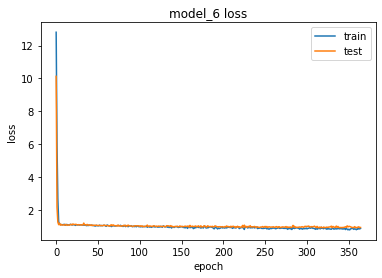

In [57]:
# summarize history for loss
plt.plot(history_6.history['loss'])
plt.plot(history_6.history['val_loss'])
plt.title('model_6 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

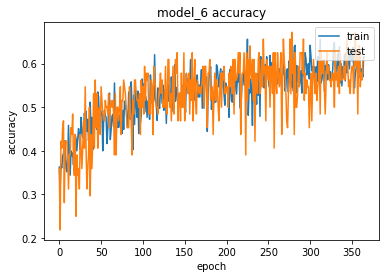

In [58]:
# summarize history for accuracy
plt.plot(history_6.history['accuracy'])
plt.plot(history_6.history['val_accuracy'])
plt.title('model_6 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

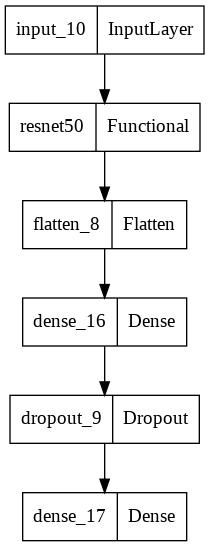

In [59]:
keras.utils.plot_model(model_6, "ResNet50_aug_model.png")

In [60]:
history_6.model.load_weights('best_model.h10')
print("Test accuracy:",np.mean(np.argmax(history_6.model.predict(x_test),1)==np.argmax(y_test,1)))
print("Τrain accuracy:",np.mean(np.argmax(history_6.model.predict(x_train),1)==np.argmax(y_train,1)))

Test accuracy: 0.6666666666666666
Τrain accuracy: 0.6939130434782609


###Hyperparameters tuning

In [61]:
pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 4.9 MB/s 
     |████████████████████████████████| 1.6 MB 43.6 MB/s 


In [66]:
from keras import layers
from kerastuner.tuners import RandomSearch

def build_model(hp):
    model= keras.Sequential()
    model.add(layers.Flatten(input_shape=(240,240,3)))
    model.add(layers.Dense(units=hp.Int("units", min_value=32, max_value=512, step=32),
            activation="relu",))
    model.add(layers.Dense(3, activation="softmax"))
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-4])), loss="categorical_crossentropy", metrics=["accuracy"])
    return model

In [79]:
import keras_tuner
tuner = keras_tuner.RandomSearch(build_model, keras_tuner.Objective('val_loss', direction='min'), max_trials=5, executions_per_trial=3, directory='tuner')



In [80]:
tuner.search(x_train, y_train, epochs=5, validation_data=(x_val, y_val))

Trial 5 Complete [00h 01m 09s]
val_loss: 10.307839075724283

Best val_loss So Far: 1.333016037940979
Total elapsed time: 00h 02m 54s


In [81]:
tuner.results_summary()

Results summary
Results in tuner/untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
units: 192
learning_rate: 0.0001
Score: 1.333016037940979
Trial summary
Hyperparameters:
units: 384
learning_rate: 0.0001
Score: 1.59809414545695
Trial summary
Hyperparameters:
units: 448
learning_rate: 0.01
Score: 10.307839075724283
Trial summary
Hyperparameters:
units: 352
learning_rate: 0.01
Score: 10.637327313423157
Trial summary
Hyperparameters:
units: 384
learning_rate: 0.01
Score: 14.850384712219238


In [82]:
# Get the top 2 models.
models = tuner.get_best_models(num_models=2)
best_model = models[0]
# Build the model.

best_model.build(input_shape=(240, 240, 3))
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 172800)            0         
                                                                 
 dense (Dense)               (None, 192)               33177792  
                                                                 
 dense_1 (Dense)             (None, 3)                 579       
                                                                 
Total params: 33,178,371
Trainable params: 33,178,371
Non-trainable params: 0
_________________________________________________________________


###Results summary

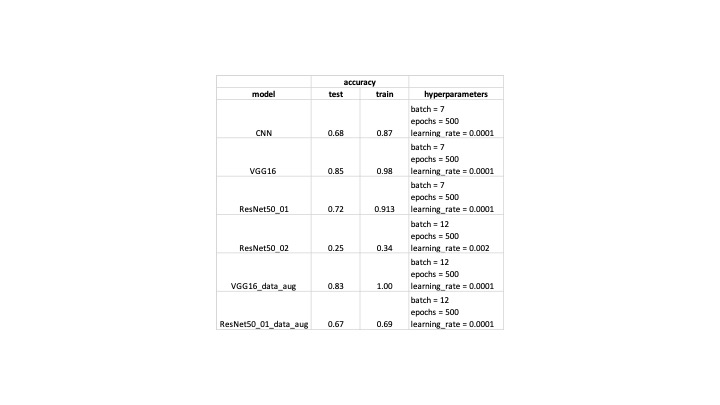